In [1]:
# importing neccessary libraries
import numpy as np
from matplotlib import pyplot as plt

In [8]:
# function defined to intialize the parameters of the neural network.
def parameterInitialization(inputParameters, hiddenLayerNeurons, outputParameters):
    
    # intializing weights in the range of 0 and 1.
    weightOne = np.random.randn(hiddenLayerNeurons, inputParameters)
    weightTwo = np.random.randn(outputParameters, hiddenLayerNeurons)
    
    # initializing bias unit values to 0.
    baisOne = np.zeros((hiddenLayerNeurons,1))
    baisTwo = np.zeros((outputParameters,1))
    
    # storing the parameters in a dictionary
    intializedParamenters = {"wOne" : weightOne, "wTwo": weightTwo, "bOne": baisOne, "bTwo": baisTwo}
    
    # returning the parameters
    return intializedParamenters

In [3]:
# defining activation function.
def activation(z):
    
    # calculating the sigmoid value
    sigmoid = 1/(1+ np.exp(z))
    
    return sigmoid

In [12]:
# defining function for forward propogation
def forwardPropogation(X, Y, initalizedParameters):
    shapeOfX = X.shape[1]
    weightOne = initalizedParameters["wOne"]
    weightTwo = initalizedParameters["wTwo"]
    baisOne = initalizedParameters["bOne"]
    baisTwo = initalizedParameters["bTwo"]
    
    # calculation activation and z values
    zOne = np.dot(weightOne, X) + baisOne
    aOne = activation(zOne)
    zTwo = np.dot(weightTwo, aOne) + baisTwo
    aTwo = activation(zTwo)
    
    # storing the all the values in a cache memory
    cacheMemory = (zOne, aOne, weightOne,baisOne, zTwo,aTwo,weightTwo, baisTwo)
     
    # calculation of the log value
    logValue = np.multiply(np.log(aTwo),Y) + np.multiply(np.log(1 - aTwo), (1 - Y))
    logprobs = np.multiply(np.log(A2), Y) + np.multiply(np.log(1 - A2), (1 - Y))
    
    # determing the value of the cost function.
    costFunction = -np.sum(logValue)/shapeOfX
    
    # returning all cost, cache and activation value. 
    return costFunction, cacheMemory, aTwo

In [18]:
# defining function for backpropogation.

def backwardPropogation(X,Y,cacheMemory):
    shapeOfX = X.shape[1]
    (zOne, aOne, weightOne,baisOne, zTwo,aTwo,weightTwo, baisTwo) = cacheMemory
    
    # performing backpropogation
    bZTwo = aTwo - Y
    bWeightTwo = np.dot(bZTwo, aOne.T)/shapeOfX
    bBaisTwo = np.sum(bZTwo, axis = 1, keepdims = True)
    
    bAOne = np.dot(weightTwo.T, bZTwo)
    bZOne = np.multiply(bAOne, aOne *(1- aOne))
    bWeightOne = np.dot(bZOne, X.T)/shapeOfX
    bBaisOne = np.sum(bZOne, axis = 1, keepdims = True)/shapeOfX
    
    gradientValues = {"bZ2": bZTwo, "bW2": bWeightTwo, "bB2": bBaisTwo, 
                      "bZ1": bZOne, "bW1": bWeightOne, "bB1": bBaisOne}
    
    # returning gradient values
    return gradientValues
    

In [21]:
# defining function to update parameters.
def updatingParameters(parameters, gradientValues, leariningRate):
    #updating parameters
    parameters["wOne"] = parameters["wOne"] - learningRate * gradientValues["bW1"]
    parameters["wTwo"] = parameters["wTwo"] - learningRate * gradientValues["bW2"]
    parameters["bOne"] = parameters["bOne"] - learningRate * gradientValues["bB1"]
    parameters["bTwo"] = parameters["bTwo"] - learningRate * gradientValues["bB2"]
    
    #returning the updated parameters
    return parameters
    

<ipython-input-12-fcbe216be978>:19: RuntimeWarning: divide by zero encountered in log
  logValue = np.multiply(np.log(aTwo),Y) + np.multiply(np.log(1- aTwo), (1 - Y))
<ipython-input-12-fcbe216be978>:19: RuntimeWarning: invalid value encountered in multiply
  logValue = np.multiply(np.log(aTwo),Y) + np.multiply(np.log(1- aTwo), (1 - Y))


[[1. 1. 1. 1.]]


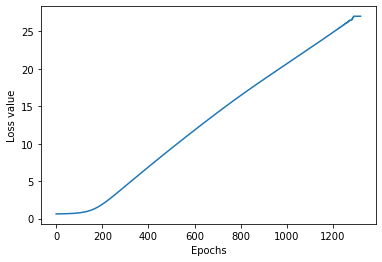

In [27]:
if __name__ == "__main__":
    
    # defining the X and Y 
    # model and the AND truth table.
    # input of AND gate 
    X = np.array([[0, 0, 1, 1], [0, 1, 0, 1]]) 
    # output of AND gate
    Y = np.array([[0, 0, 0, 1]])
    
    # defining the parameters of the model to be trained
    # number of neurons in the hidden layer
    hiddenLayerNeurons = 2
    # number of input features
    inputParameters = X.shape[0]
    # number of output features
    outputParameters = Y.shape[0]
    
    #calling functions to initalize parameters
    parameters = parameterInitialization(inputParameters, hiddenLayerNeurons, outputParameters)
    
    #declaring epoch and learning rate.
    epoch = 100000
    learningRate = 0.01
    losses = np.zeros((epoch,1))
    
    #training model
    for i in range(epoch):
        losses[i,0], cacheMemory , aTwo = forwardPropogation(X, Y, parameters)
        gradientValues = backwardPropogation(X,Y,cacheMemory)
        parameters = updatingParameters(parameters, gradientValues, learningRate)
    
    
    
    # Testing and Making Prediction
    X = np.array([[1, 1, 0, 0], [0, 1, 0, 1]])
    costValue, _, aTwo = forwardPropogation(X, Y,parameters)
    predictedOutput = (aTwo > 0.5) * 1.0
    print(predictedOutput)
    
    # Plotting Curve between Loss and Epochs
    plt.figure()
    plt.plot(losses)
    plt.xlabel("Epochs")
    plt.ylabel("Loss value")
    plt.show()
    
    
    